## Setup

In [2]:
import torchvision.transforms as tfs
from src.models.utils import download_checkpoint, load_model
from src.experiments import *
from src.experiments.utils import *
from src.visualization import *
from src.optimization import *
from IPython.display import Image 
from PIL import Image

checkpoint_path = download_checkpoint("https://drive.google.com/file/d/19m_SaRNEF7JXHjeyNu26AxgaEQXqpI00", "protopnet.pt")
model = load_model('protopnet', checkpoint_path, device="cpu")

# Draw "real" prototypes

In [ ]:
# crop all training images from given class using bounding boxes and save to data/train_cropped/
crop_images("189.Red_bellied_Woodpecker") 

tensor(0.5332, grad_fn=<CopyBackwards>)


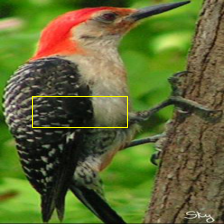

tensor(0.4064, grad_fn=<CopyBackwards>)


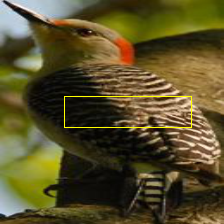

tensor(0.7241, grad_fn=<CopyBackwards>)


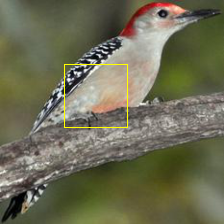

tensor(1.3434, grad_fn=<CopyBackwards>)


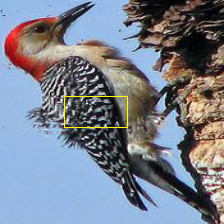

tensor(0.5678, grad_fn=<CopyBackwards>)


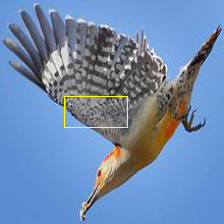

tensor(0.4889, grad_fn=<CopyBackwards>)


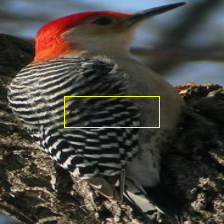

tensor(0.5122, grad_fn=<CopyBackwards>)


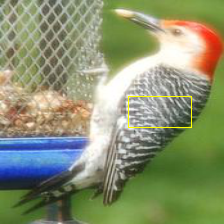

tensor(0.8005, grad_fn=<CopyBackwards>)


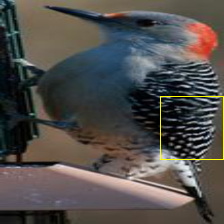

tensor(0.5843, grad_fn=<CopyBackwards>)


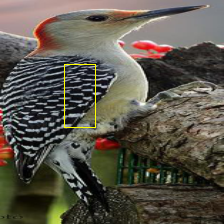

tensor(0.6833, grad_fn=<CopyBackwards>)


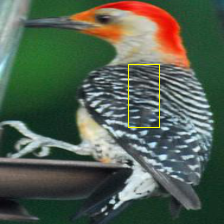

tensor(0.5695, grad_fn=<CopyBackwards>)


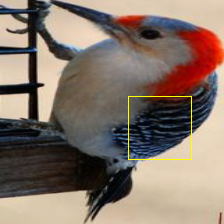

tensor(0.5638, grad_fn=<CopyBackwards>)


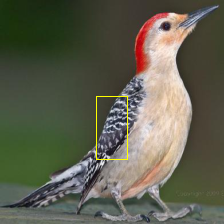

tensor(0.9120, grad_fn=<CopyBackwards>)


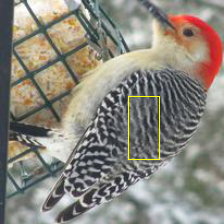

tensor(0.6096, grad_fn=<CopyBackwards>)


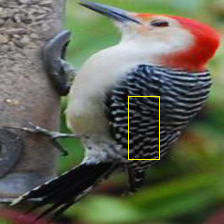

tensor(1.3609, grad_fn=<CopyBackwards>)


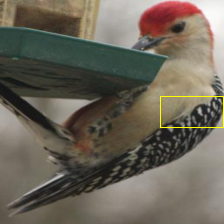

tensor(0.4896, grad_fn=<CopyBackwards>)


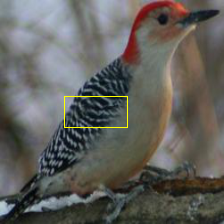

tensor(0.4797, grad_fn=<CopyBackwards>)


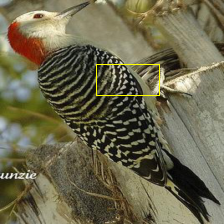

tensor(0.4664, grad_fn=<CopyBackwards>)


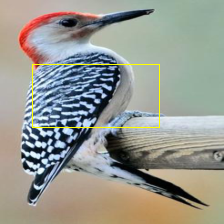

tensor(0.8158, grad_fn=<CopyBackwards>)


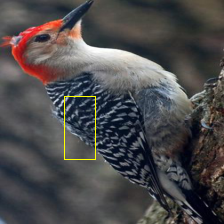

tensor(1.9262, grad_fn=<CopyBackwards>)


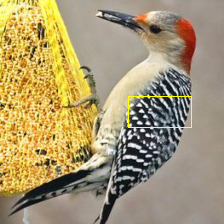

tensor(1.2709, grad_fn=<CopyBackwards>)


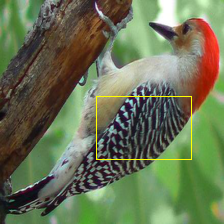

tensor(1.2601, grad_fn=<CopyBackwards>)


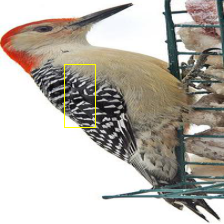

tensor(0.4675, grad_fn=<CopyBackwards>)


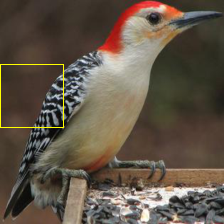

tensor(0.8435, grad_fn=<CopyBackwards>)


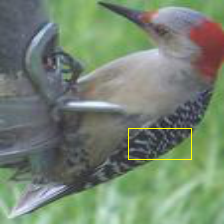

tensor(0.5935, grad_fn=<CopyBackwards>)


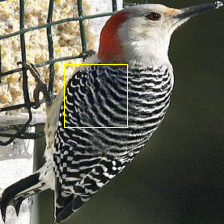

tensor(0.5208, grad_fn=<CopyBackwards>)


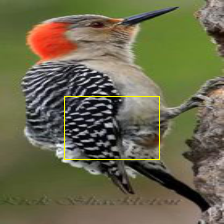

tensor(0.6564, grad_fn=<CopyBackwards>)


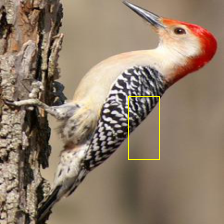

tensor(0.4678, grad_fn=<CopyBackwards>)


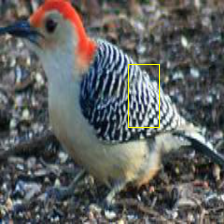

tensor(0.5437, grad_fn=<CopyBackwards>)


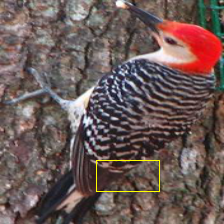

tensor(0.2891, grad_fn=<CopyBackwards>)


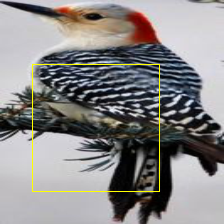

In [ ]:
# Visualize given prototype for given class using all training images
directory = "data/train_cropped/189.Red_bellied_Woodpecker"
for file in os.listdir(directory):
        filename = os.fsdecode(file)
        if filename.endswith(".jpg"):
            name = "189.Red_bellied_Woodpecker/" + filename
            img = visualize_real_prototype(model, name, 188, 0)
            display(img)

tensor(0.5332, grad_fn=<CopyBackwards>)


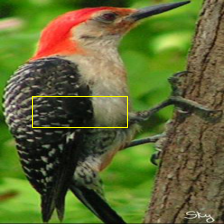

tensor(0.5419, grad_fn=<CopyBackwards>)


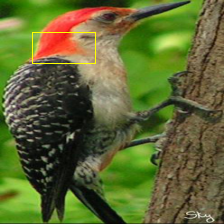

tensor(0.6290, grad_fn=<CopyBackwards>)


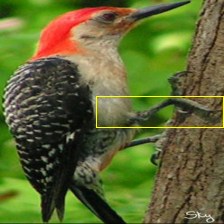

tensor(0.5924, grad_fn=<CopyBackwards>)


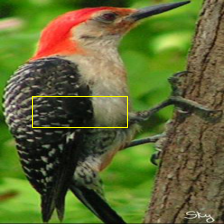

tensor(0.5080, grad_fn=<CopyBackwards>)


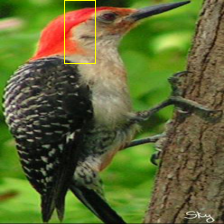

tensor(0.2413, grad_fn=<CopyBackwards>)


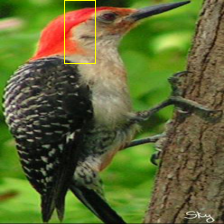

tensor(0.5973, grad_fn=<CopyBackwards>)


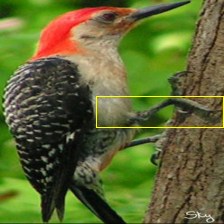

tensor(0.6070, grad_fn=<CopyBackwards>)


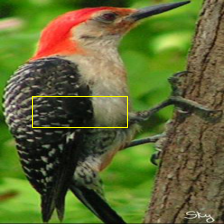

tensor(0.5694, grad_fn=<CopyBackwards>)


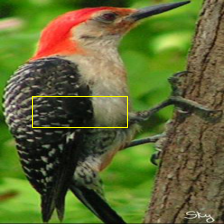

tensor(0.5009, grad_fn=<CopyBackwards>)


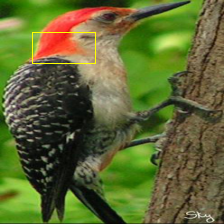

In [ ]:
# Visualize all prototypes for given class using one training image
for i in range(10):
    img = visualize_real_prototype(model, "189.Red_bellied_Woodpecker/Red_Bellied_Woodpecker_0002_180879.jpg", 188, i)
    display(img)

# Experiment 1
Vizualize prototype from starting from red square.

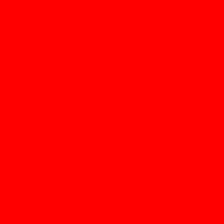

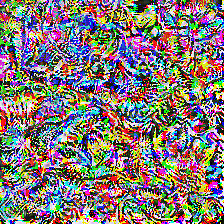

In [ ]:
ptypes = [(188,1)]

size = (3, 224, 224)
input_tensor = torch.zeros(size).float()
input_tensor[0, :] = 1.0
display(tfs.ToPILImage()(input_tensor))

image = visualize_prototypes(model, ptypes, optimization_steps=100, input_tensor=input_tensor)

pilimg = tfs.ToPILImage()(image)
display(pilimg)

# Experiment 2
Vizualize prototype starting from the bird image (cropped and resized).

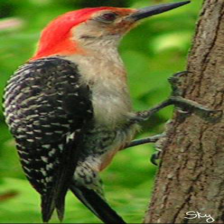

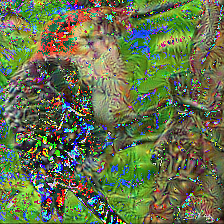

In [ ]:
transform = tfs.Compose([
    tfs.Resize(size=(img_size, img_size)),
    tfs.ToTensor()])
input_image = Image.open("data/train_cropped/189.Red_bellied_Woodpecker/Red_Bellied_Woodpecker_0002_180879.jpg")
input_tensor = transform(input_image)
display(tfs.ToPILImage()(input_tensor))

image = visualize_prototypes(model, ptypes, optimization_steps=100, input_tensor=input_tensor)
pilimg = tfs.ToPILImage()(image)
display(pilimg)

# Experiment 3
Vizualize prototype starting from the bird image (cropped, resized and normalized).

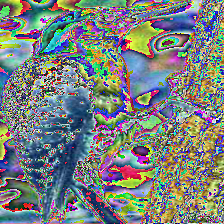

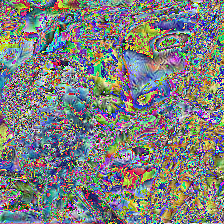

In [ ]:
mean = (0.485, 0.456, 0.406)
std = (0.229, 0.224, 0.225)
normalize = tfs.Normalize(mean, std)
transform = tfs.Compose([
    tfs.Resize(size=(img_size, img_size)),
    tfs.ToTensor(),
    normalize])
input_image = Image.open("data/train_cropped/189.Red_bellied_Woodpecker/Red_Bellied_Woodpecker_0002_180879.jpg")
input_tensor = transform(input_image)
display(tfs.ToPILImage()(input_tensor))

image = visualize_prototypes(model, ptypes, optimization_steps=100, input_tensor=input_tensor)
pilimg = tfs.ToPILImage()(image)
display(pilimg)

# Experiment 4

Clamp and blur before every optimizer step.

step: 0/500, loss: 0.14592716097831726


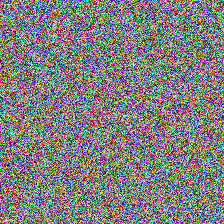

step: 100/500, loss: 0.06350773572921753
step: 200/500, loss: 0.06171790882945061
step: 300/500, loss: 0.07299622893333435
step: 400/500, loss: 0.0628475546836853


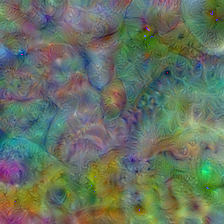

In [3]:
ptypes = [(188,1)]

def before_optim_step(t):
    tt = torch.clamp(t, 0, 1)
    t.data = tfs.GaussianBlur(7, 2)(tt).data

size = (3, 224, 224)
input_tensor = torch.randn(size)

image = visualize_prototypes(model, ptypes, optimization_steps=500, input_tensor=input_tensor,
                             before_optim_step=before_optim_step, optimizer_kwargs={'lr': 0.2})

pilimg = tfs.ToPILImage()(image)
display(pilimg)

## Optimized prototypes vs real prototypes

In [ ]:
# draw_optimized_prototypes_vs_real_prototypes(model)

## Optimized prototypes vs real prototypes - distance histogram

In [ ]:
# draw_distance_histogram(model)